In [1]:
import pandas as pd
ignore warnings
warnings.filterwarnings('ignore')


In [2]:
dataset=pd.read_csv("income.csv")

In [3]:
dataset

,age,workclass,fnlwgt,education,educational-number,civil-status,occupation,relationship,race,gender,capital gain,capital loss,duration(hrs),country-born,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Inorder to convert the above categroical columns like educational_num into the numerical/ encode, we use one hot encoding

In [4]:
dataset.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
print(dataset.workclass.value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
print(dataset.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [7]:
dataset

,age,workclass,fnlwgt,education,educational-number,civil-status,occupation,relationship,race,gender,capital gain,capital loss,duration(hrs),country-born,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Specify the categorical columns you want to encode
categorical_columns = ['race', 'relationship','occupation', 'workclass', 'civil-status','country-born']

# Create a copy of the dataset to avoid modifying the original
dataset_encoded = dataset.copy()

# Apply OneHotEncoder to all categorical columns at once
encoder = OneHotEncoder(sparse=False, drop='first')  # Set drop='first' to handle multicollinearity

# Extract the categorical columns from the dataset
categorical_data = dataset[categorical_columns]

# Apply OneHotEncoder and create a DataFrame with the encoded values
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
dataset_encoded = pd.concat([dataset_encoded, encoded_df], axis=1)

# Drop the original categorical columns if needed
dataset_encoded = dataset_encoded.drop(categorical_columns, axis=1)

# Now, 'dataset_encoded' contains the original data with the one-hot encoded categorical columns
(dataset_encoded)

,age,fnlwgt,education,educational-number,gender,capital gain,capital loss,duration(hrs),income,race_Asian-Pac-Islander,...,country-born_Portugal,country-born_Puerto-Rico,country-born_Scotland,country-born_South,country-born_Taiwan,country-born_Thailand,country-born_Trinadad&Tobago,country-born_United-States,country-born_Vietnam,country-born_Yugoslavia
0,25,226802,11th,7,Male,0,0,40,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,HS-grad,9,Male,0,0,50,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,Assoc-acdm,12,Male,0,0,40,>50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,Some-college,10,Male,7688,0,40,>50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,Some-college,10,Female,0,0,30,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Female,0,0,38,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,154374,HS-grad,9,Male,0,0,40,>50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,151910,HS-grad,9,Female,0,0,40,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,201490,HS-grad,9,Male,0,0,20,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


This Python method does one-hot encoding on designated categorical columns in a DataFrame ('dataset') using the scikit-learn `OneHotEncoder. It concatenates the original data with the one-hot encoded values to generate a new DataFrame ('dataset_encoded'). Dropping the first encoded category for each feature is how multicollinearity is handled when the 'drop' option is set to 'first'.


In [9]:
dataset_encoded.columns.values

array(['age', 'fnlwgt', 'education', 'educational-number', 'gender',
       'capital gain', 'capital loss', 'duration(hrs)', 'income',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workc

In [10]:
dataset_encoded=dataset_encoded.drop("education",axis=1)

In [11]:
df=dataset_encoded.copy()


In [12]:
dataset_encoded.columns.values

array(['age', 'fnlwgt', 'educational-number', 'gender', 'capital gain',
       'capital loss', 'duration(hrs)', 'income',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-go

In [13]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})


In [14]:
df=df.drop("fnlwgt",axis=1) #dropping unnnecesssary columns

In [15]:
df

,age,educational-number,gender,capital gain,capital loss,duration(hrs),income,race_Asian-Pac-Islander,race_Black,race_Other,...,country-born_Portugal,country-born_Puerto-Rico,country-born_Scotland,country-born_South,country-born_Taiwan,country-born_Thailand,country-born_Trinadad&Tobago,country-born_United-States,country-born_Vietnam,country-born_Yugoslavia
0,25,7,1,0,0,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,1,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,1,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,1,7688,0,40,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,10,0,0,0,30,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,9,1,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,9,0,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,9,1,0,0,20,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


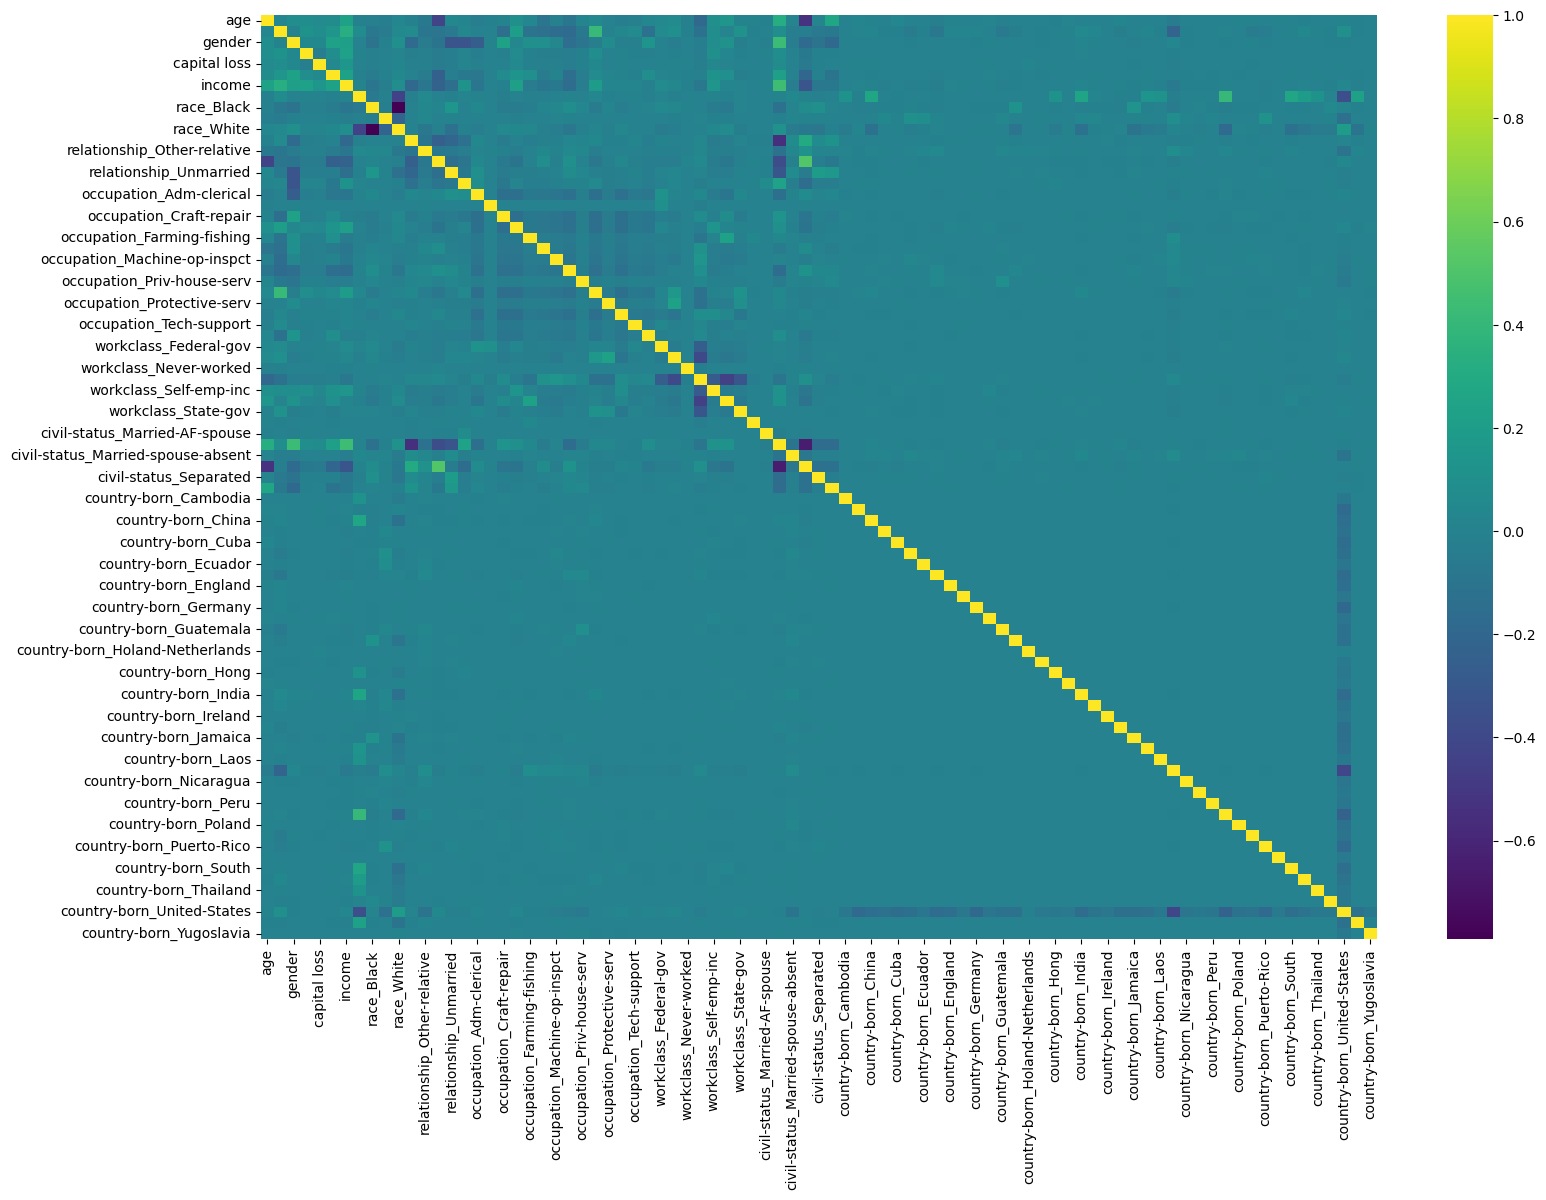

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.show()


In [17]:
df.corr()

,age,educational-number,gender,capital gain,capital loss,duration(hrs),income,race_Asian-Pac-Islander,race_Black,race_Other,...,country-born_Portugal,country-born_Puerto-Rico,country-born_Scotland,country-born_South,country-born_Taiwan,country-born_Thailand,country-born_Trinadad&Tobago,country-born_United-States,country-born_Vietnam,country-born_Yugoslavia
age,1.000000,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,-0.010260,-0.017324,-0.033295,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
educational-number,0.030940,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,0.064153,-0.074364,-0.044093,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.003363,-0.111481,-0.009774,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital gain,0.077229,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,0.011016,-0.021456,-0.001178,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
capital loss,0.056944,0.080972,0.045480,-0.031441,1.000000,0.054467,0.147554,0.003581,-0.020956,-0.005576,...,-0.008047,0.002636,-0.004503,0.005638,0.003078,-0.002338,0.004028,0.009449,-0.000118,-0.004713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country-born_Thailand,-0.001766,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,0.114571,-0.005269,-0.002270,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
country-born_Trinadad&Tobago,0.001056,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,0.015858,0.054455,0.007441,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
country-born_United-States,0.011888,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,-0.363160,0.014796,-0.130331,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
country-born_Vietnam,-0.012337,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,0.228792,-0.013680,-0.003845,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


The above code snippet is used to find the correlation between each column with other columns.

In [18]:
corr_income=df.corr()['income'].abs()
sorted_corr=corr_income.sort_values()
no_columns_to_drop=int(0.8*len(df.columns))
cols_to_drop=sorted_corr.iloc[:no_columns_to_drop].index
df_dropped=df.drop(cols_to_drop,axis=1)

Here we are trying to drop the less related column and saving them in df_dropped

In [19]:
df_dropped

,age,educational-number,gender,capital gain,capital loss,duration(hrs),income,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,civil-status_Married-civ-spouse,civil-status_Never-married
0,25,7,1,0,0,40,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,9,1,0,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,12,1,0,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,44,10,1,7688,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18,10,0,0,0,30,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,40,9,1,0,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,58,9,0,0,0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48840,22,9,1,0,0,20,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

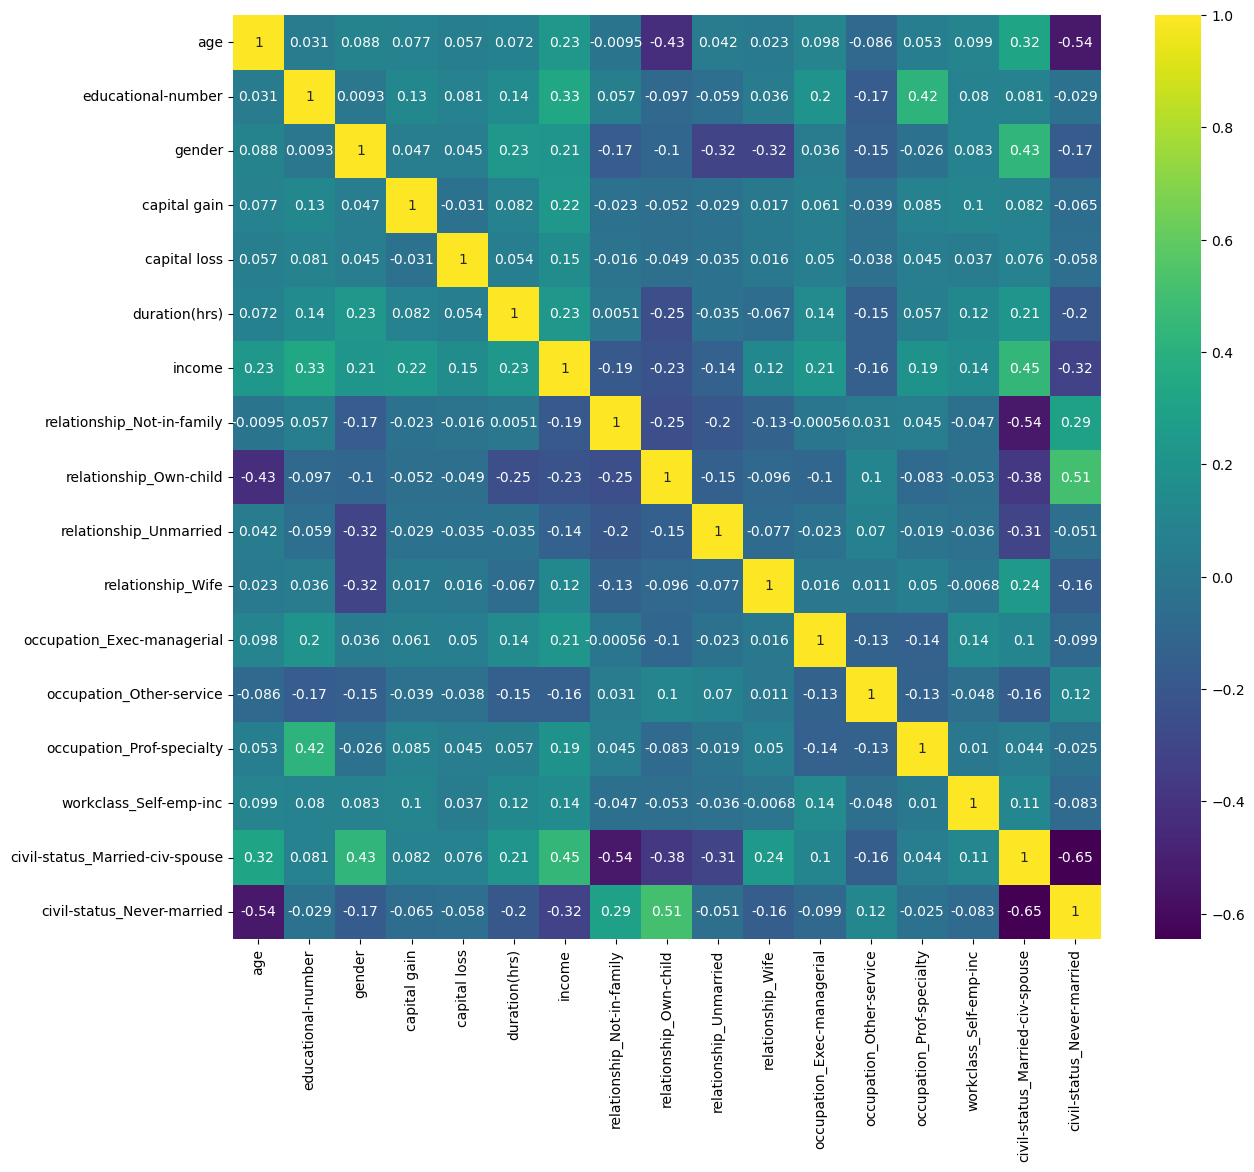

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df_dropped.corr(),annot=True, cmap='viridis')

as we have more numerial datatype/yes or no in the columns we are going to use the random forest method which is decision tree

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df=train_test_split(df, test_size=0.2)

In [22]:
train_df

,age,educational-number,gender,capital gain,capital loss,duration(hrs),income,race_Asian-Pac-Islander,race_Black,race_Other,...,country-born_Portugal,country-born_Puerto-Rico,country-born_Scotland,country-born_South,country-born_Taiwan,country-born_Thailand,country-born_Trinadad&Tobago,country-born_United-States,country-born_Vietnam,country-born_Yugoslavia
26513,21,9,0,0,0,35,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7800,23,3,1,0,0,35,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10462,62,9,1,0,0,42,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32138,68,10,1,0,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39085,48,13,0,0,0,44,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,27,13,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11379,42,12,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8037,40,10,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41211,33,10,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
test_df

,age,educational-number,gender,capital gain,capital loss,duration(hrs),income,race_Asian-Pac-Islander,race_Black,race_Other,...,country-born_Portugal,country-born_Puerto-Rico,country-born_Scotland,country-born_South,country-born_Taiwan,country-born_Thailand,country-born_Trinadad&Tobago,country-born_United-States,country-born_Vietnam,country-born_Yugoslavia
28426,64,9,1,0,0,5,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29965,42,11,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41204,68,14,1,0,0,18,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37567,20,10,0,0,0,6,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43112,30,7,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,38,15,1,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21665,19,9,0,0,0,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20332,29,13,1,0,0,40,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8240,17,8,1,0,0,35,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
train_x=train_df.drop('income',axis=1)
train_y=train_df['income']

test_x=test_df.drop('income',axis=1)
test_y=test_df['income']


In [25]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [26]:
forest.score(test_x,test_y)

0.8505476507319071

In [27]:
forest.feature_importances_

array([2.27769187e-01, 1.32549511e-01, 1.94962520e-02, 1.20766128e-01,
       3.85553201e-02, 1.13351173e-01, 3.13161764e-03, 5.26329542e-03,
       9.60938430e-04, 6.86892328e-03, 1.69377746e-02, 2.34644009e-03,
       8.81705069e-03, 9.49130399e-03, 8.61244594e-03, 5.28785297e-03,
       8.57449484e-05, 6.02148930e-03, 1.84264238e-02, 4.11401096e-03,
       3.18202007e-03, 3.94465484e-03, 7.70832377e-03, 2.05486374e-04,
       1.68797117e-02, 3.02834328e-03, 6.41384693e-03, 4.49040705e-03,
       4.02835194e-03, 4.91328893e-03, 5.74632136e-03, 5.34432132e-06,
       9.94273365e-03, 6.69596335e-03, 7.67993656e-03, 4.45043324e-03,
       1.55690056e-04, 3.47603520e-04, 8.47004723e-02, 1.47546430e-03,
       4.38940742e-02, 2.62198852e-03, 2.28019458e-03, 2.72084178e-04,
       1.52620512e-03, 6.80279441e-04, 3.75341928e-04, 7.19587878e-04,
       2.29805497e-04, 1.95363225e-04, 3.31984250e-04, 9.43590100e-04,
       4.16976235e-04, 9.48820953e-04, 4.33986087e-04, 1.03925576e-04,
      

In [28]:
forest.feature_names_in_

array(['age', 'educational-number', 'gender', 'capital gain',
       'capital loss', 'duration(hrs)', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Witho

In [29]:
imp=dict(zip(forest.feature_names_in_,forest.feature_importances_,))
imp={k: v for k, v in sorted(imp.items(), key=lambda x: x[1], reverse=True)}

In [30]:
imp

{'age': 0.22776918709972518,
 'educational-number': 0.1325495114732838,
 'capital gain': 0.12076612762577107,
 'duration(hrs)': 0.1133511727603843,
 'civil-status_Married-civ-spouse': 0.08470047231004649,
 'civil-status_Never-married': 0.04389407424222472,
 'capital loss': 0.03855532013033901,
 'gender': 0.019496252023684466,
 'occupation_Exec-managerial': 0.0184264237679468,
 'relationship_Not-in-family': 0.016937774585223664,
 'occupation_Prof-specialty': 0.016879711691908075,
 'workclass_Private': 0.009942733649112925,
 'relationship_Unmarried': 0.009491303988847457,
 'relationship_Own-child': 0.00881705069149328,
 'relationship_Wife': 0.008612445941775983,
 'occupation_Other-service': 0.007708323767159022,
 'workclass_Self-emp-not-inc': 0.007679936557383493,
 'country-born_United-States': 0.007315569256063832,
 'race_White': 0.006868923278094223,
 'workclass_Self-emp-inc': 0.0066959633480430745,
 'occupation_Sales': 0.006413846928555106,
 'occupation_Craft-repair': 0.00602148930326

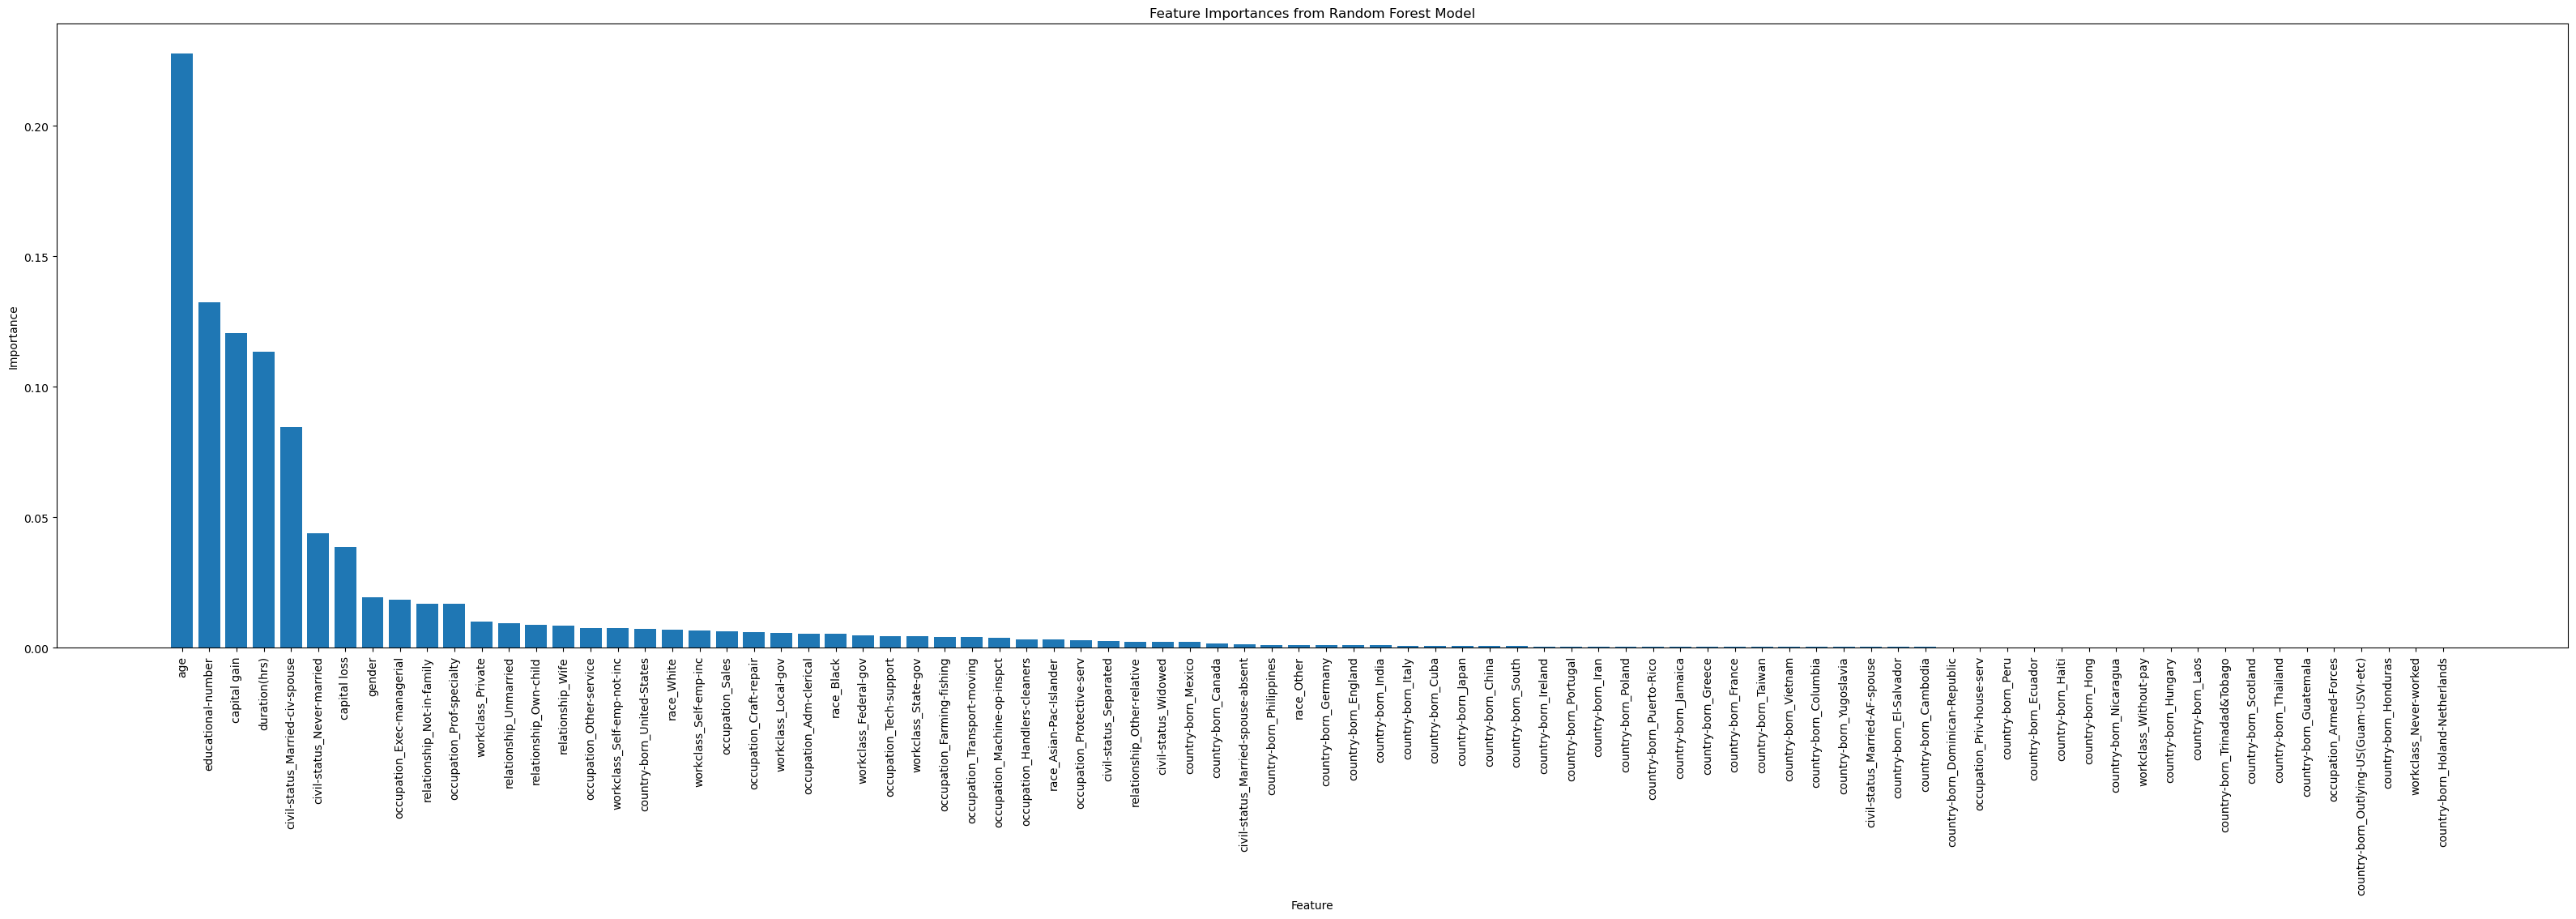

In [31]:
import matplotlib.pyplot as plt


# Plotting the feature importances
features = list(imp.keys())
importances = list(imp.values())

plt.figure(figsize=(40,10))
bar_width=0.6
plt.bar(range(len(features)), importances, align="center")
plt.xticks(range(len(features)), features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances from Random Forest Model")
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 25, None],
    'min_samples_split': [2, 4],
    
    'max_features': [ 'sqrt', 'log2'],

}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)
 

In [33]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   1.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   1.8s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.825 total time=   1.8s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.8s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.805 total time=   3.0s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.815 total time=   3.2s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.805 total time=   7.9s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.799 total time=   7.3s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.810 total time=   7.6s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.859 total time=   3.4s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.863 total time=   3.1s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.859 total time=   4.2s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.858 total time=   5.8s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.857 total time=   6.4s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=  13.0s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.854 total time=  13.3s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=  13.3s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.859 total time=  13.3s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=  13.3s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=25, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.865 total time=   2.9s
[CV 5/5; 31/48] START max_depth=25, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=25, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.863 total time=   3.0s
[CV 1/5; 32/48] START max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.866 total time=   5.9s
[CV 2/5; 32/48] START max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.858 total time=   6.0s
[CV 3/5; 32/48] START max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=25, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   6.0s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.847 total time=  19.7s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=  19.1s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.847 total time=  19.3s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=  18.6s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.858 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.852 total time=   3.2s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   6.0s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time=   6.1s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.854 total time=   6.9s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.855 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 25, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [34]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_split=4, n_estimators=250)

In [35]:
forest=grid_search.best_estimator_
forest.score(test_x,test_y)

0.8657999795270754

In [36]:
imp=dict(zip(forest.feature_names_in_,forest.feature_importances_,))
imp={k: v for k, v in sorted(imp.items(), key=lambda x: x[1], reverse=True)}

In [37]:
top_10_features = list(imp.keys())[:10]
top_10_importances = [imp[feature] for feature in top_10_features]

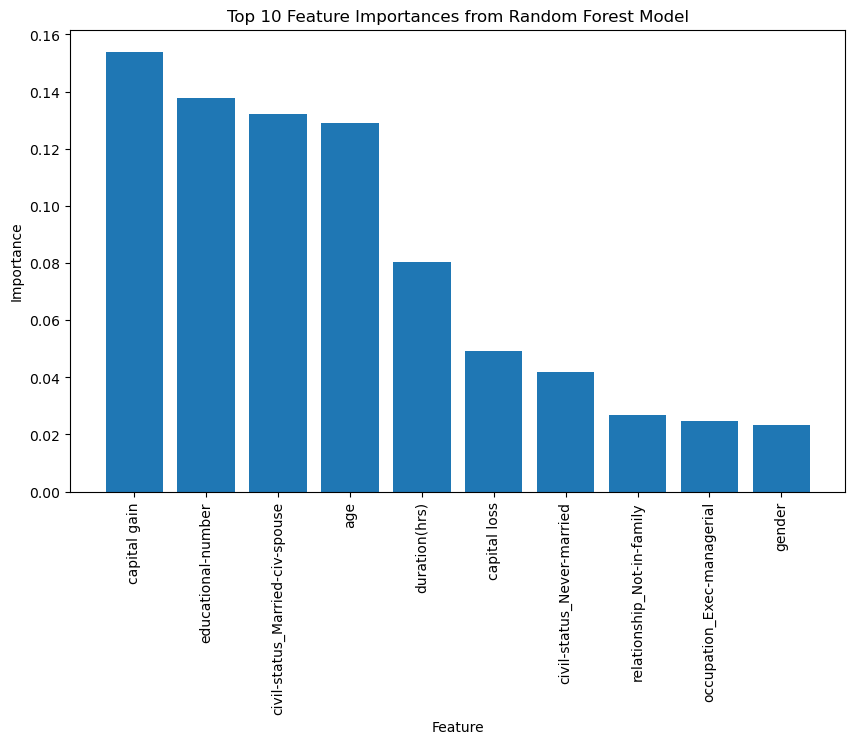

In [38]:
plt.figure(figsize=(10, 6))
bar_width = 0.6
plt.bar(range(len(top_10_features)), top_10_importances, align="center")
plt.xticks(range(len(top_10_features)), top_10_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances from Random Forest Model")
plt.show()

In [39]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Define hyperparameters for each model
logreg_hyperparams = {'C': np.arange(0.1, 1.1, 0.3), 'multi_class': ['auto', 'ovr', 'multinomial'], 'solver': ['newton-cg']}
rf_hyperparams = {'n_estimators': [50, 100, 250], 'max_depth': [5, 10, 25, None], 'min_samples_split': [2, 4], 'max_features': ['sqrt', 'log2']}
knn_hyperparams = {'n_neighbors': range(3, 8), 'weights': ['uniform', 'distance']}
sgd_hyperparams = {'loss': ['hinge', 'log', 'modified_huber']}


These dictionaries define hyperparameters for machine learning models. For logistic regression, key parameters are the solver technique (solver), multi-class strategy (multi_class), and regularization strength (C). Random Forest hyperparameters include the number of trees (n_estimators), maximum depth (max_depth), minimum split samples (min_samples_split), and maximum features (max_features). k-Nearest Neighbors has parameters for the weight function (weights) and number of neighbors (n_neighbors). Stochastic Gradient Descent has a hyperparameter for the loss function (loss).

In [41]:
# Create a dictionary of models with their corresponding hyperparameters
models = {
    'Logistic Regression': {'model': LogisticRegression(), 'hyperparams': logreg_hyperparams},
    'KNN': {'model': KNeighborsClassifier(), 'hyperparams': knn_hyperparams},
    'SGD': {'model': SGDClassifier(), 'hyperparams': sgd_hyperparams},
    'Random Forest': {'model': RandomForestClassifier(), 'hyperparams': rf_hyperparams}
}

There are four machine learning models in the "models" dictionary, each with corresponding hyperparameters. Stochastic Gradient Descent (SGD), Random Forest, K-Nearest Neighbors (KNN), and Logistic Regression are among the models.


In [42]:
# Dictionary to store accuracy results
accuracy_results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(name, model, params, train_x, train_y, test_x, test_y):
    print(f'\nTraining {name}...')

    # Find the best hyperparameters
    best_params = find_best_hyperparameters(model, params, train_x, train_y)

    # Set the model with the best hyperparameters
    model.set_params(**best_params)

    # Train the model
    model.fit(train_x, train_y)

    # Evaluate the model
    evaluate_model(name, model, test_x, test_y)

The code defines a function train_and_evaluate_model that takes a model name, the model itself, its hyperparameters, training and testing data, and trains the model. It uses a function find_best_hyperparameters to determine the best hyperparameters and then evaluates the model using evaluate_model. The results are stored in the accuracy_results dictionary.

In [43]:
# Function to find the best hyperparameters using GridSearchCV
def find_best_hyperparameters(model, params, train_x, train_y):
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(train_x, train_y)
    best_params = grid_search.best_params_
    print(f'Best Hyperparameters: {best_params}')
    return best_params

There are four machine learning models in the "models" dictionary, each with corresponding hyperparameters. Stochastic Gradient Descent (SGD), Random Forest, K-Nearest Neighbors (KNN), and Logistic Regression are among the models.


In [44]:
# Function to evaluate the model and print results
def evaluate_model(name, model, test_x, test_y):
    y_pred = model.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    accuracy_results[name] = accuracy

    print(f'Test Accuracy for {name}: {accuracy:.12f}')
    print(f'Confusion Matrix for {name}:\n{confusion_matrix(test_y, y_pred)}')
    print(f'Classification Report for {name}:\n{classification_report(test_y, y_pred)}')
    print('-' * 50)

Using the model on the test data, the evaluate_model function predicts the labels and determines the accuracy. It prints the model's accuracy, confusion matrix, and classification report after updating the accuracy_results dictionary.


In [ ]:
# Train and evaluate each model
for name, model_info in models.items():
    model = model_info['model']
    params = model_info['hyperparams']
    train_and_evaluate_model(name, model, params, train_x, train_y, test_x, test_y)


The train_and_evaluate_model function is called to train, adjust hyperparameters, and assess each model on test data. This loop iterates through each model in the models dictionary, retrieves the corresponding model and hyperparameters, and then calls the function.


In [46]:
# Print final accuracy results
print('\nFinal Accuracy Results:')
for model_name, accuracy in accuracy_results.items():
    print(f'Accuracy for best {model_name}: {accuracy:.15f}')



Final Accuracy Results:
Accuracy for best Logistic Regression: 0.851366567714198
Accuracy for best KNN: 0.843586856382434
Accuracy for best SGD: 0.811649094073088
Accuracy for best Random Forest: 0.864059780939707


By iterating through the accuracy_results dictionary and displaying the accuracy for each model along with its name, the code prints the final accuracy results for each model.


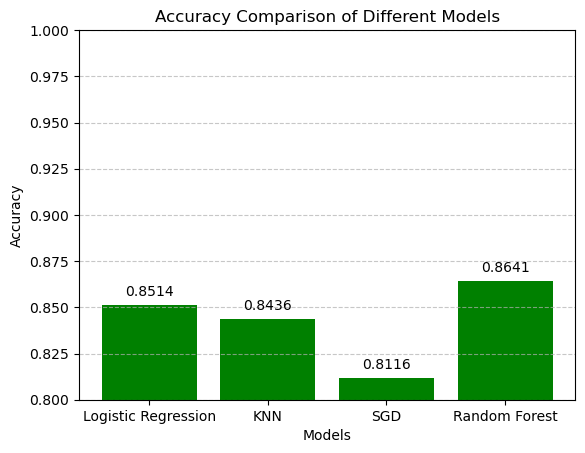

In [47]:
import matplotlib.pyplot as plt

# TO Extract model names and accuracies for plotting
model_names = []
accuracies = []

# TO Populate model_names and accuracies from the loop
for model_name, accuracy in accuracy_results.items():
    model_names.append(model_name)
    accuracies.append(accuracy)

# TO Create a bar graph
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color='green')

# TO Display the accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{accuracy:.4f}', ha='center')

# Customize the plot
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# TO Show the plot
plt.show()
